In [45]:
import os
from skimage import data
from skimage.io import imsave, imread, imshow
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

In [193]:

ORIGINAL = "./originals/100x100_1.png"
TRAIN_PATH = "./p20/train/"
TEST_PATH = "./p20/test/"

SAMPLE_IMAGE = "./p20/train/images/0.png"
SAMPLE_LABEL = "./p20/train/labels/0.png"
SAMPLE_ANOTATION = "./p20/train/anotations/0.png"
SAMPLE_TEST = "./1.png"


In [194]:

def split_image(image_path, save_path, splited_dimensions):
    image = imread(image_path)
    nrows, ncols, nchanls = image.shape
    M, N = splited_dimensions
    tiles = [image[x:x+M, y:y+N]
             for x in range(0, image.shape[0], M) for y in range(0, image.shape[1], N)]
    for i in range(64):
        imsave(save_path+str(i)+".png", tiles[i])



In [195]:
def label2BW(image_name, image_path, label_path):
    label = imread(image_path+image_name)
    label = 255 * (label[:, :, 1] > 0)
    imsave(label_path+image_name, label)

In [196]:
def createLabels(anotation_path, label_path):
    a = os.listdir(anotation_path)
    for img in a:
        saveBW(img, anotation_path, label_path)

In [216]:
def img2BW(image_path):
    image = imread(image_path)
    print(image.shape)
#     from skimage.color import rgba2rgb
#     image = rgba2rgb(image)

    # image[:, :, 2] = 0 * (image[:, :, 2])
    image = image[:, :, 2]
    image = filters.sobel(image)
    
#     print(image.shape)
    image = 255 * (image[:, :] < 0.12)
#     print(image)

    # image = np.invert(image)
    # image = filters.inverse(image)

    plt.imshow(image, cmap='gray')
    plt.show()
    imsave(TRAIN_PATH+"sample_test.png", image)

(512, 512, 4)


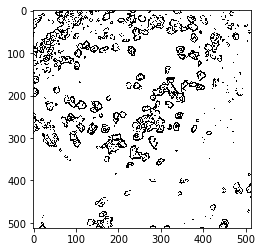

In [217]:
# filter(SAMPLE_TEST)
img2BW(SAMPLE_IMAGE)

In [98]:
SAMPLE_TEST
""

'./SAMPLE.png'

In [100]:
image = imread(SAMPLE_TEST)

In [102]:
image = image[:, :, 2]
image

array([[  2,   2,   3,   4,   4,   4,   3,   2],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   1,   0,   3,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  4,   3, 197,   1,   0, 255, 255, 255],
       [  2,   2, 197,   1,   2, 255, 255, 255]], dtype=uint8)

In [142]:
new = 0.1 * (image[:,:] < 100)
new

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0. , 0.1, 0.1, 0. , 0. , 0. ],
       [0.1, 0.1, 0. , 0.1, 0.1, 0. , 0. , 0. ]])